# Ejercicios

## Leave One Out Cross-Validation (LOOCV)

Este método es de tipo iterativo y se inicia empleando como conjunto de entrenamiento todas las observaciones **disponibles excepto una**, que se excluye para emplearla como validación.  

Para evitarlo,**el proceso se repite tantas veces como observaciones disponibles, excluyendo en cada iteración una observación distinta**, ajustando el modelo con el resto y calculando el error con dicha observación.

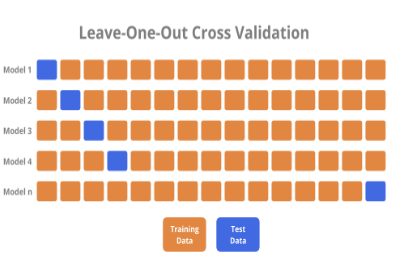

### LOOCV para clasificacion

In [1]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

**Descripcion de datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names

**Enlace con datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv

El archivo "sonar.mines" contiene 111 patrones obtenidos al hacer rebotar señales de sonar en un cilindro de metal en varios ángulos y bajo diversas condiciones. El archivo "sonar.rocks" contiene 97 patrones obtenidos de rocas en condiciones similares. La señal del sonar transmitida es un chirrido de frecuencia modulada, aumentando en frecuencia. El conjunto de datos contiene señales obtenidas desde una variedad de ángulos de aspecto diferentes, que abarcan 90 grados para el cilindro y 180 grados para la roca.

Cada patrón es un conjunto de 60 números en el rango de 0,0 a 1,0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La apertura de integración para frecuencias más altas ocurre más tarde, ya que estas frecuencias se transmiten más tarde durante el chirrido.

La etiqueta asociada a cada registro contiene la letra "R" si el objeto es una roca y "M" si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente de ángulo de aspecto, pero no codifican el ángulo directamente.

In [2]:
# datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
#Estructura de nuetsro dataset
dataframe.shape

(208, 61)

In [6]:
#Datos nulos
dataframe.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
#Separamos los datos en X e Y
X, y = data[:, :-1], data[:, -1]

In [9]:
print(X.shape, y.shape)

(208, 60) (208,)


In [10]:
#Crear el objeto leave one out
cv = LeaveOneOut()

In [11]:
LeaveOneOut?

In [17]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [18]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

```
# Crear un modelo de clasificación RandomForestClassifier
model = RandomForestClassifier(
    random_state=1,      # Semilla para la reproducibilidad de los resultados
    n_estimators=30,     # Número de árboles en el bosque (30 en este caso)
    criterion="gini",    # Criterio de división de los nodos del árbol ("gini" o "entropy")
    max_depth=4          # Profundidad máxima de cada árbol (4 en este caso)
)

```




In [16]:
#Crear nuestro modelo
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)

In [20]:
#Obtener los scores
cross_val_score?

In [21]:
#Evaluar el modleo utilizando leave one out
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.4s


```
*   X: Tus datos de características.
*   y: Las etiquetas o variable objetivo que estás tratando de predecir.
*   model: Tu modelo de aprendizaje automático, en este caso, el RandomForestClassifier.
*   scoring: La métrica que se utilizará para evaluar el rendimiento del modelo. En este caso, 'accuracy' mide la precisión del modelo en clasificación.
*   cv: Esquema de validación cruzada. Puede ser un objeto de validación cruzada como KFold o un número entero que indica el número de divisiones en la validación cruzada.
*   verbose: Controla la cantidad de mensajes de progreso que se imprimirán durante la validación cruzada. Un valor de 1 imprimirá mensajes, mientras que 0 suprime la salida.
```



In [22]:
#Revisión de performance del problema
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.808 (0.394)


### LOOCV para regresion

**Descripcion de datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names

**Enlace con datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv

CRIM Tasa de criminalidad per cápita por ciudad

1. ZN Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
2. INDUS Proporción de acres de negocios no minoristas por ciudad
3. CHAS Variable ficticia de Charles River (= 1 si el área limita con el río; 0 en caso contrario)
4. NOX Concentración de óxidos de nitrógeno (partes por 10 millones)
5. RM Número promedio de habitaciones por vivienda
6. AGE Proporción de unidades ocupadas por el propietario construidas antes de 1940
7. DIS Distancias ponderadas a cinco centros de empleo en Boston
8. RAD Índice de accesibilidad a carreteras radiales
9. TAX Tasa de impuesto a la propiedad de valor completo por cada 10,000
10. PTRATIO Proporción de alumnos por maestro por ciudad
11. B 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por ciudad
12. LSTAT % de estatus inferior de la población
13. MEDV Valor mediano de las viviendas ocupadas por el propietario en miles de dólares.

In [23]:
# librerias
from pandas import read_csv
# cargar datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# shape
print(dataframe.shape)

(506, 14)


In [24]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [26]:
#Separar conjunto de datos en X e Y

data= dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(506, 13) (506,)


In [27]:
#Crear objeto de LOOCV
cv = LeaveOneOut()

In [28]:
#Crear el modelo randomforest ára regresión
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

**Metodos de scoring disponibles**

https://scikit-learn.org/stable/modules/model_evaluation.html

In [29]:
#Evaluar el modelo con respecto al MAE

from sklearn.metrics import mean_squared_error,  make_scorer, mean_absolute_error

MAE = make_scorer(mean_absolute_error)
scores = cross_val_score(model, X, y, scoring=MAE, cv=cv,error_score='raise',verbose=1)
# convertir a postivos
scores = abs(scores)
# reportar el performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    8.2s


MAE: 2.650 (2.727)


El desempeño del modelo al hacer las predicciones sobre nuevos datos tiene un MAE de 2.650 miles de dólares.

# Validacion simple

El archivo "sonar.mines" contiene 111 patrones obtenidos al hacer rebotar señales de sonar en un cilindro de metal en varios ángulos y bajo diversas condiciones. El archivo "sonar.rocks" contiene 97 patrones obtenidos de rocas en condiciones similares. La señal del sonar transmitida es un chirrido de frecuencia modulada, aumentando en frecuencia. El conjunto de datos contiene señales obtenidas desde una variedad de ángulos de aspecto diferentes, que abarcan 90 grados para el cilindro y 180 grados para la roca.

Cada patrón es un conjunto de 60 números en el rango de 0,0 a 1,0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La apertura de integración para frecuencias más altas ocurre más tarde, ya que estas frecuencias se transmiten más tarde durante el chirrido.

La etiqueta asociada a cada registro contiene la letra "R" si el objeto es una roca y "M" si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente de ángulo de aspecto, pero no codifican el ángulo directamente.

## Clasificacion

In [30]:
# datos
from sklearn.model_selection import train_test_split
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [31]:
#Separamos datos en X e Y

data= dataframe.values
X,y = data[:,:-1],data[:, -1]

In [32]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [33]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [34]:
#División el split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape)

(166, 60) (42, 60)


In [35]:
#Crear el modelo y hacer el fit

model = RandomForestClassifier(random_state= 42,n_estimators=30, criterion="gini",max_depth= 10)
# Ajuste
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=42)

In [36]:
predicciones= model.predict(X_test)
predicciones[0:5]

array(['M', 'R', 'R', 'R', 'R'], dtype=object)

In [37]:
#Evaluar las métricas
from sklearn.metrics import classification_report
print(classification_report(y_true= y_test, y_pred= predicciones))

              precision    recall  f1-score   support

           M       0.85      0.85      0.85        26
           R       0.75      0.75      0.75        16

    accuracy                           0.81        42
   macro avg       0.80      0.80      0.80        42
weighted avg       0.81      0.81      0.81        42



## Regresion

In [38]:
# librerias
from pandas import read_csv
# cargar datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# shape
print(dataframe.shape)

(506, 14)


In [39]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [40]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [41]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [42]:
#Hacemos el split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [43]:
#Creamos modelo
# Moelo
model =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
# Ajuste
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [44]:
#Realizamos predicciones
predicciones= model.predict(X_test)

In [45]:
#Evaluamos las métricas de regresión con validación simple
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE: ',mean_squared_error(y_true= y_test, y_pred= predicciones))
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))
print('R2: ',r2_score(y_true= y_test, y_pred= predicciones))

MSE:  13.170802522785756
MAE:  2.658644386814249
R2:  0.8304463228739355


## **Ejercicio 2**

In [46]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

**Descripcion de datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names

**Enlace con datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv

El archivo "sonar.mines" contiene 111 patrones obtenidos al hacer rebotar señales de sonar en un cilindro de metal en varios ángulos y bajo diversas condiciones. El archivo "sonar.rocks" contiene 97 patrones obtenidos de rocas en condiciones similares. La señal del sonar transmitida es un chirrido de frecuencia modulada, aumentando en frecuencia. El conjunto de datos contiene señales obtenidas desde una variedad de ángulos de aspecto diferentes, que abarcan 90 grados para el cilindro y 180 grados para la roca.

Cada patrón es un conjunto de 60 números en el rango de 0,0 a 1,0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La apertura de integración para frecuencias más altas ocurre más tarde, ya que estas frecuencias se transmiten más tarde durante el chirrido.

La etiqueta asociada a cada registro contiene la letra "R" si el objeto es una roca y "M" si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente de ángulo de aspecto, pero no codifican el ángulo directamente.

In [47]:
# datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [48]:
#Como no tenemos nulos
#Dividimos el conjunto de datos en X e Y
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(208, 60) (208,)


In [49]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [50]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [51]:
#Crear el procedimiento de k folds stratified
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [52]:
#Obtener conjunto de train y test
train, test = list(skf.split(X, y))[0]
train

array([  0,   1,   2,   4,   5,   6,   7,  10,  11,  12,  13,  14,  16,
        18,  19,  20,  21,  22,  24,  25,  27,  29,  30,  31,  32,  33,
        35,  36,  37,  39,  40,  42,  43,  45,  46,  47,  49,  52,  54,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  99,
       100, 101, 102, 103, 105, 106, 107, 109, 110, 111, 112, 114, 115,
       116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 146, 148, 149, 150, 151, 153, 154, 155, 156, 158, 160,
       161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 177,
       179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 196, 197, 199, 200, 201, 203, 204, 205, 207])

In [53]:
train

array([  0,   1,   2,   4,   5,   6,   7,  10,  11,  12,  13,  14,  16,
        18,  19,  20,  21,  22,  24,  25,  27,  29,  30,  31,  32,  33,
        35,  36,  37,  39,  40,  42,  43,  45,  46,  47,  49,  52,  54,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  99,
       100, 101, 102, 103, 105, 106, 107, 109, 110, 111, 112, 114, 115,
       116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 146, 148, 149, 150, 151, 153, 154, 155, 156, 158, 160,
       161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 177,
       179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 196, 197, 199, 200, 201, 203, 204, 205, 207])

In [54]:
test

array([  3,   8,   9,  15,  17,  23,  26,  28,  34,  38,  41,  44,  48,
        50,  51,  53,  55,  82,  85,  94,  97,  98, 104, 108, 113, 122,
       145, 147, 152, 157, 159, 163, 169, 174, 176, 178, 180, 181, 195,
       198, 202, 206])

In [55]:
X[test]

array([[0.01, 0.0171, 0.0623, ..., 0.0044, 0.004, 0.0117],
       [0.0223, 0.0375, 0.0484, ..., 0.0093, 0.0059, 0.0022],
       [0.0164, 0.0173, 0.0347, ..., 0.0035, 0.0056, 0.004],
       ...,
       [0.0238, 0.0318, 0.0422, ..., 0.0013, 0.0035, 0.006],
       [0.0272, 0.0378, 0.0488, ..., 0.0051, 0.0065, 0.0103],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048]], dtype=object)

In [56]:
#Obtener las métricas con respecto a los splits

from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)

# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  #Paso 1: Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Paso 2: Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Paso 3: Hacemos el fit del modelo
  model.fit(X_train_n, y_train_n)
  # Paso 4: Hacemos las Predicciones
  pred= model.predict(X_test_n)
  #Paso 5:  Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.7619047619047619
Iteracion:  2  Accuracy: 0.8095238095238095
Iteracion:  3  Accuracy: 0.8095238095238095
Iteracion:  4  Accuracy: 0.8292682926829268
Iteracion:  5  Accuracy: 0.8048780487804879
Accuracy promedio: 0.8030197444831592


## **Ejercicio 3**

In [57]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

**Descripcion de datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names

**Enlace con datos**
https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv

1. CRIM      per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per 10,000
11. PTRATIO pupil teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in $1000's

In [58]:
# librerias
from pandas import read_csv
# cargar datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# shape
print(dataframe.shape)

(506, 14)


In [59]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
#Separar conjunto de datos en X e Y
data= dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(506, 13) (506,)


In [61]:
cross_val_score?

In [62]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de regresión de bosque aleatorio
model = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=4)

# Calcular los valores de R^2 utilizando validación cruzada
scores = cross_val_score(model, X, y, cv=7, verbose=1, scoring='r2')

# Imprimir los valores de R^2 para cada pliegue
print("Valores de R^2 para cada pliegue:", scores)

# Calcular y imprimir el promedio de R^2
mean_r2 = np.mean(scores)
print("Promedio de R^2:", mean_r2)

Valores de R^2 para cada pliegue: [0.67152428 0.75302672 0.76552283 0.57554926 0.60489191 0.28954785
 0.00781734]
Promedio de R^2: 0.5239828840638593
